# Team 10's Linear Regression assignment
Team member:
- Xin Feng
- Fahimeh Gholami
- Mu Zhao

## Part 1: Data Exploration:

In [142]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### 1.1 Investigate each variable in the dataset to understand its properties.

In [143]:
# load the data
df = pd.read_excel("https://drive.google.com/uc?export=download&id=12OcdvbGCL8VxqsUHMvizNiGqTL7cIYgi")
df.head()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0,chevrolet chevelle malibu
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0,buick skylark 320
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0,plymouth satellite
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0,amc rebel sst
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0,ford torino


In [144]:
print("# Information about the dataset")
print(df.info())

# Information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GallonsPer100Miles        392 non-null    float64
 1   GallonsPer100MilesTo1981  362 non-null    float64
 2   MPG                       392 non-null    float64
 3   Cylinders                 392 non-null    int64  
 4   Displacement100ci         392 non-null    float64
 5   Horsepower100             392 non-null    float64
 6   Weight1000lb              392 non-null    float64
 7   Seconds0to60              392 non-null    float64
 8   Year                      392 non-null    int64  
 9   Year70To81                392 non-null    int64  
 10  Origin                    392 non-null    int64  
 11  Origin.Eq.1               392 non-null    int64  
 12  Origin.Eq.2               392 non-null    int64  
 13  Origin.Eq.3               392 non

In [145]:
print("\n# Summary statistics for each feature")
print(df.describe())


# Summary statistics for each feature
       GallonsPer100Miles  GallonsPer100MilesTo1981         MPG   Cylinders  \
count          392.000000                362.000000  392.000000  392.000000   
mean             4.782243                  4.912568   23.445918    5.471939   
std              1.663944                  1.659047    7.805007    1.705783   
min              2.145923                  2.145923    9.000000    3.000000   
25%              3.448276                  3.571429   17.000000    4.000000   
50%              4.396135                  4.651163   22.750000    4.000000   
75%              5.882353                  6.024744   29.000000    8.000000   
max             11.111111                 11.111111   46.600000    8.000000   

       Displacement100ci  Horsepower100  Weight1000lb  Seconds0to60  \
count          392.00000     392.000000    392.000000    392.000000   
mean             1.94412       1.044694      2.977584     15.541327   
std              1.04644       0.384

We droped the column `GallonsPer100MilesTo1981` and `MPG` because they are similar to `GallonsPer100Miles` which is our dependent variable.

In [146]:
df = df.drop(columns=["GallonsPer100MilesTo1981", "MPG", "Year70To81", "Name"])

Then we applied the check.

In [147]:
print("\n# Check for missing values")
print(df.isnull().sum())
print("\n# Check for duplicated values")
print(df.duplicated().sum())


# Check for missing values
GallonsPer100Miles    0
Cylinders             0
Displacement100ci     0
Horsepower100         0
Weight1000lb          0
Seconds0to60          0
Year                  0
Origin                0
Origin.Eq.1           0
Origin.Eq.2           0
Origin.Eq.3           0
dtype: int64

# Check for duplicated values
0


### 1.2 Visualize the data distribution for each variable

#### Plot histograms for each feature

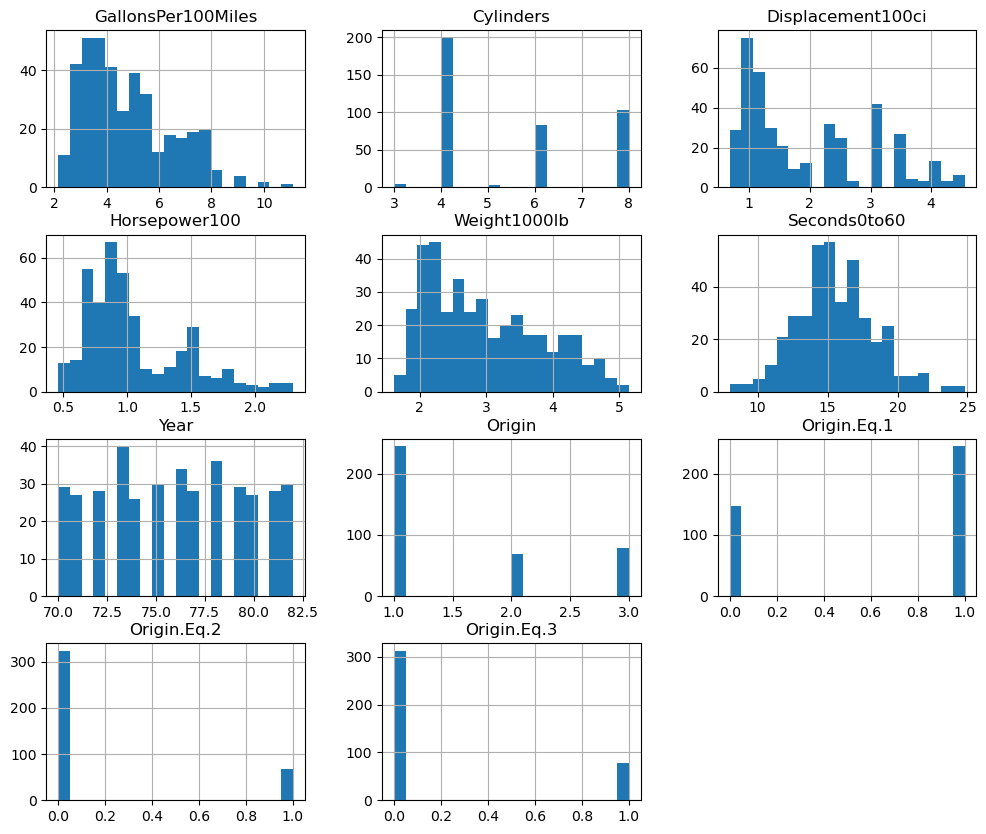

In [148]:
df.hist(bins=20, figsize=(12, 10))
plt.show()

##### Data Insights from Histograms

- From **Gallons per mile**, we can see most cars consume between 3 and 5.
- From **Displacement100ci**: most of values are from 0.5 to 2.
- From **Horsepower100**: most values are on the left.
- From **Weight100lb**: most values are around 2 to 3.5.
- From **Second0to60**: values are centered around 15 seconds.

## Part 2: Model Building

For model building, we are predicting the GallonsPer100Miles (dependent variable) using the independent variables like car weight, horsepower, and others. Follow these steps:

### 2.1 Study the relationships between variables

#### Scatterplots

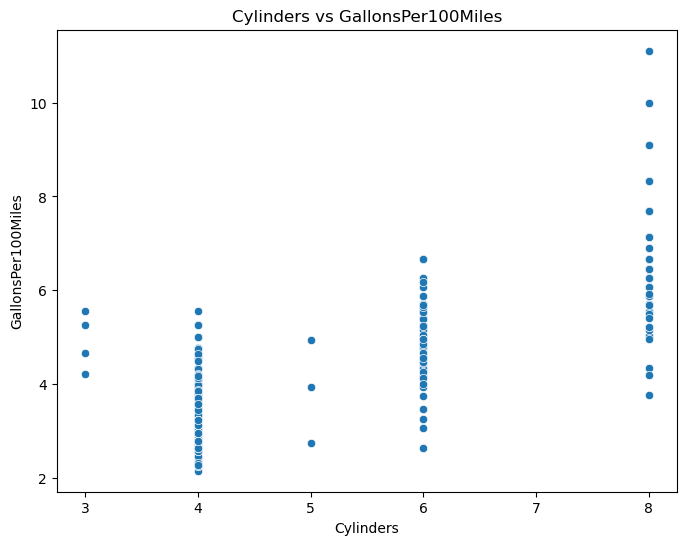

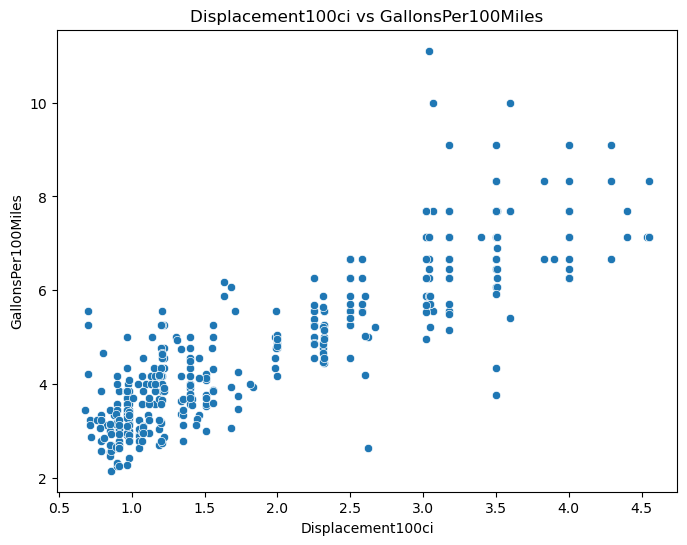

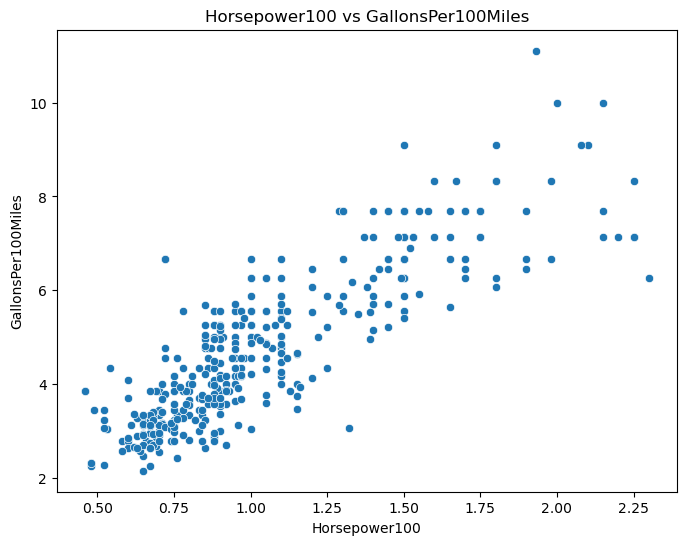

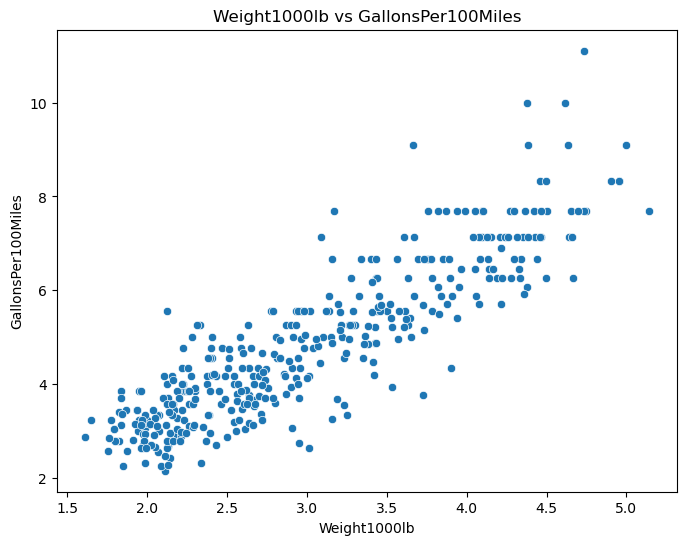

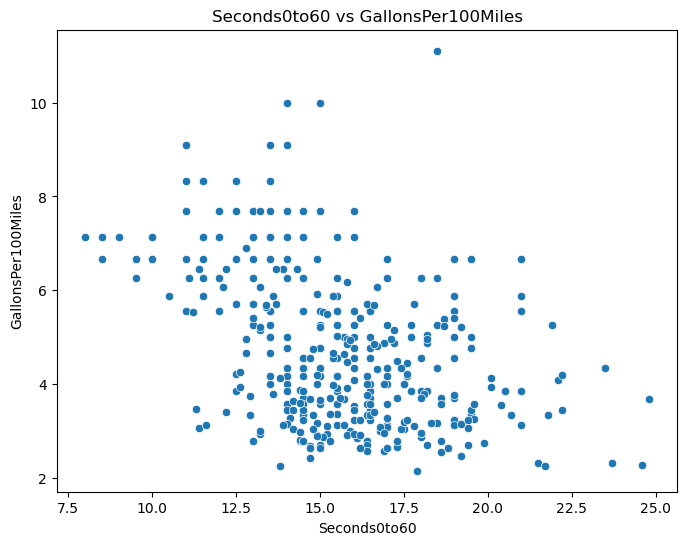

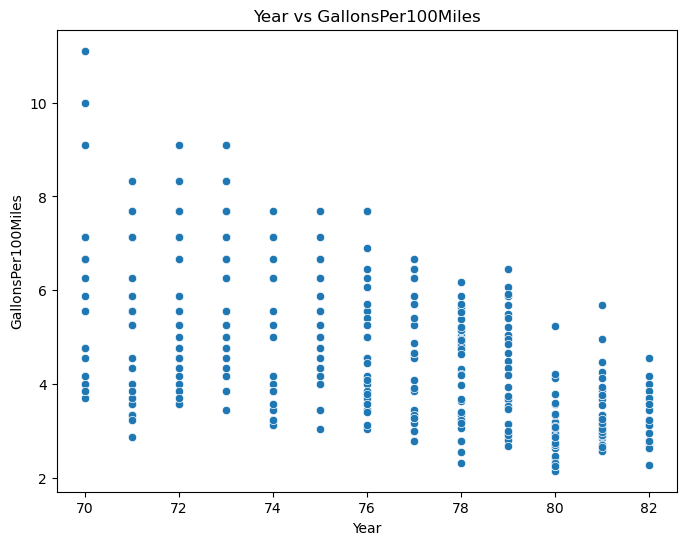

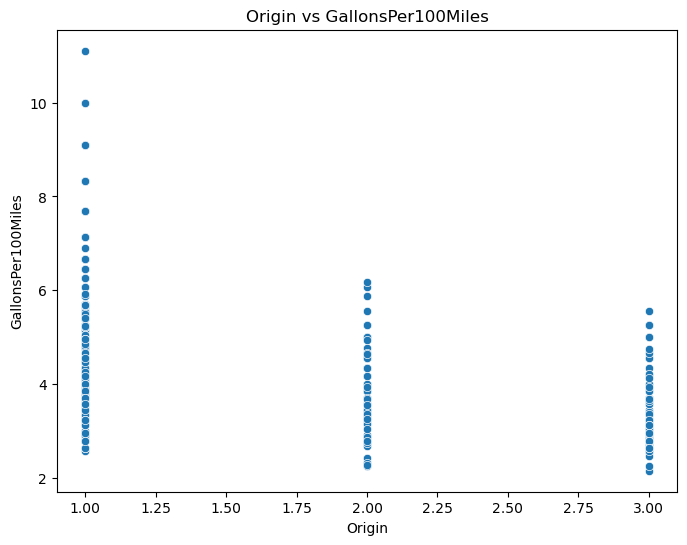

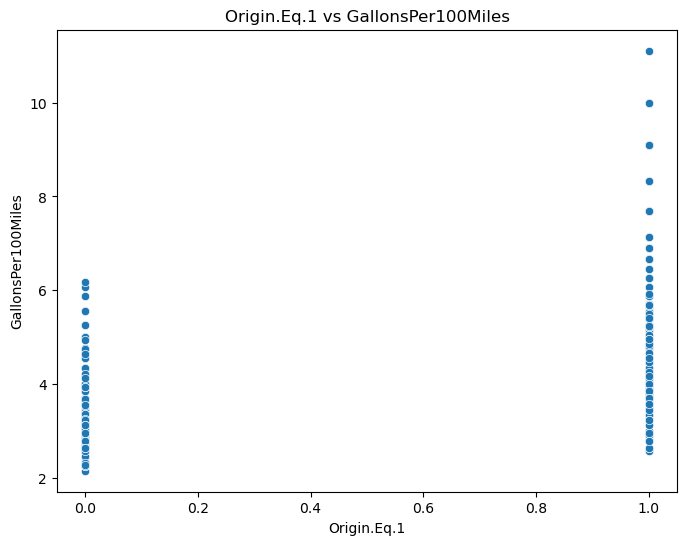

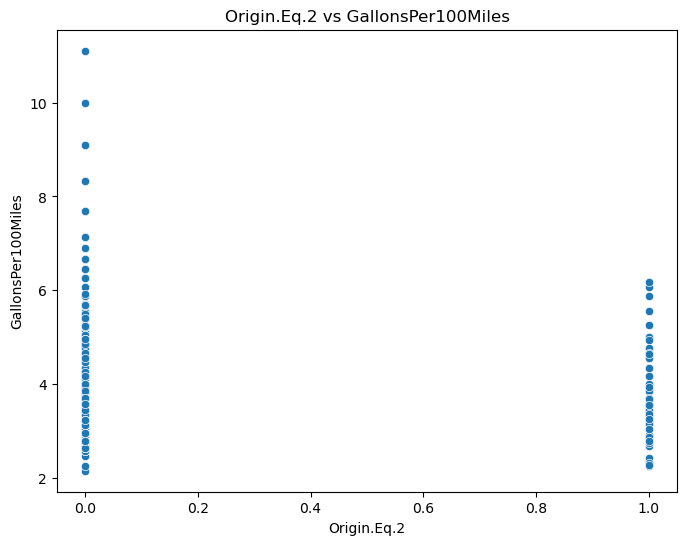

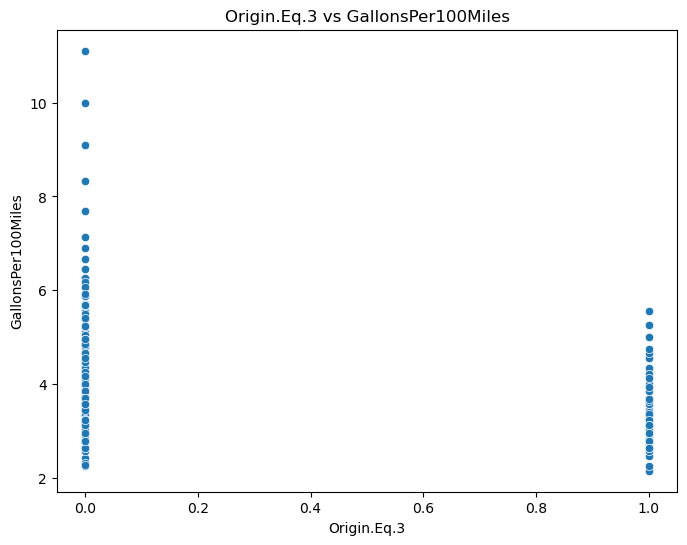

In [149]:
def plot_scatter_plots(df, target_column='GallonsPer100Miles'):
    for column in df.columns:
        if column != target_column:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=df[column], y=df[target_column])
            plt.title(f'{column} vs {target_column}')
            plt.xlabel(column)
            plt.ylabel(target_column)
            plt.show()

plot_scatter_plots(df)

- `Displacement100ci` vs `GallonsPer100Miles`: A clear positive correlation is observed.
- `Horsepower100` vs `GallonsPer100Miles`: A strong positive correlation exists, higher horsepower leads to greater fuel consumption.
- `Weight1000lb` vs vs `GallonsPer100Miles`: Another strong positive correlation is observed, heavier vehicles consume more fuel.

#### Correlation Matrix

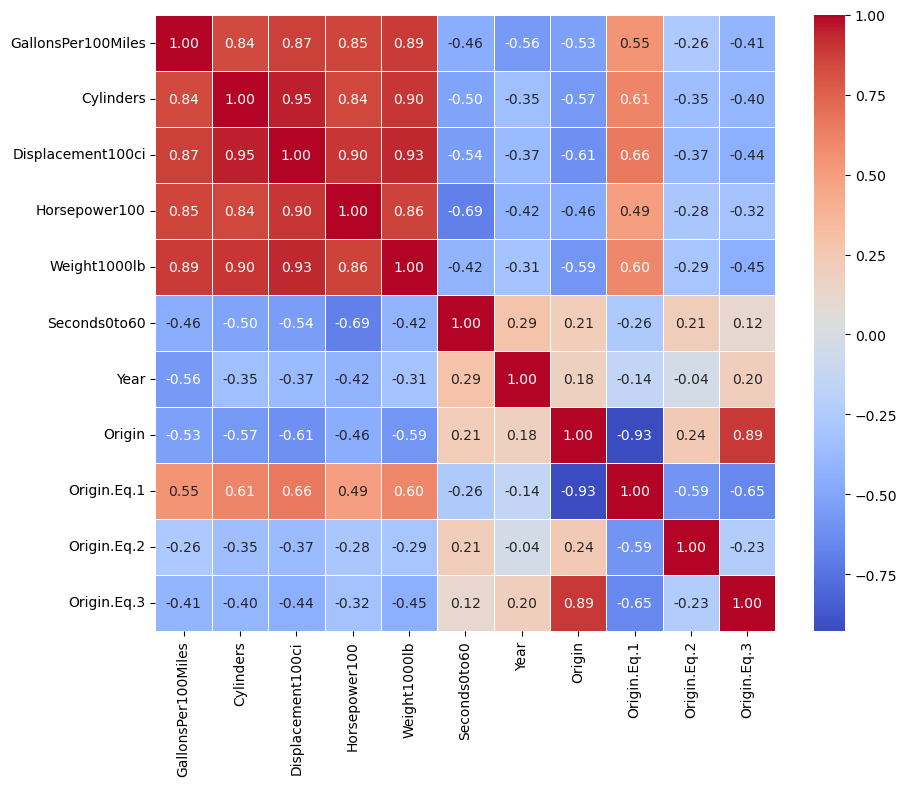

In [150]:
df_numeric = df.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

<Axes: >

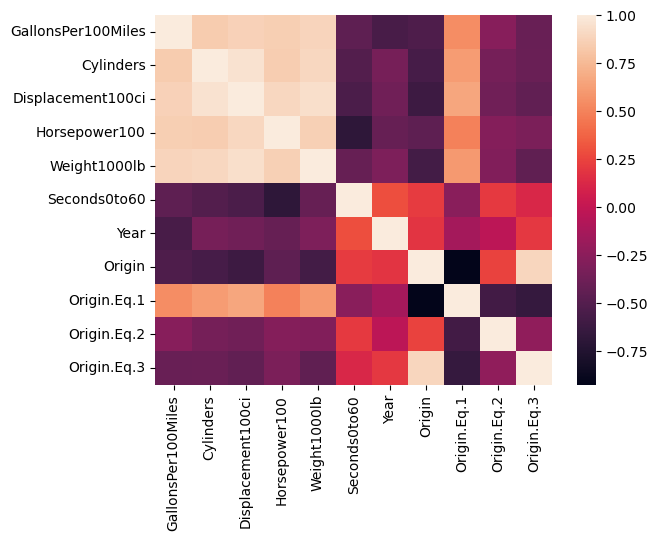

In [157]:
sns.heatmap(df.corr())

`GallonsPer100Miles` has strong positive correlations with `Cylinders`, `Displacement100ci`, `Horsepower100`, and `Weight1000lb`, indicating larger, heavier, and more powerful vehicles consume more fuel. Fuel consumption decreases over time (Year) and is negatively correlated with acceleration time (Seconds0to60).

### 2.2 Linear Regression Model

We define a function to train the model.

In [152]:
def linear_regression_model(features, target, df):
    X = df[features]
    y = df[target]

    # Split the tranning set and test set.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model.
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predictor.
    y_pred = model.predict(X_test)
    
    # Calculate the MSE.
    mse = mean_squared_error(y_test, y_pred)
    print(f"Features: {features} | Mean Squared Error: {mse}")
    print(f"Model trained with features: {model.feature_names_in_}")
    model.score(X, y)

    # Calculate and display the R² score on the whole dataset
    r2_score = model.score(X, y)
    print(f"R² Score on entire dataset: {r2_score:.4f}")
    
    # Visualize.
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted (Features: {", ".join(features)})')
    plt.show()

##### Based on our observations, we decided to test `Weight1000lb`, `Horsepower100`, and `Displacement100ci` as features to train our model and identify which one performs best.

Features: ['Horsepower100'] | Mean Squared Error: 0.6063871946037422
Model trained with features: ['Horsepower100']
R² Score on entire dataset: 0.7305


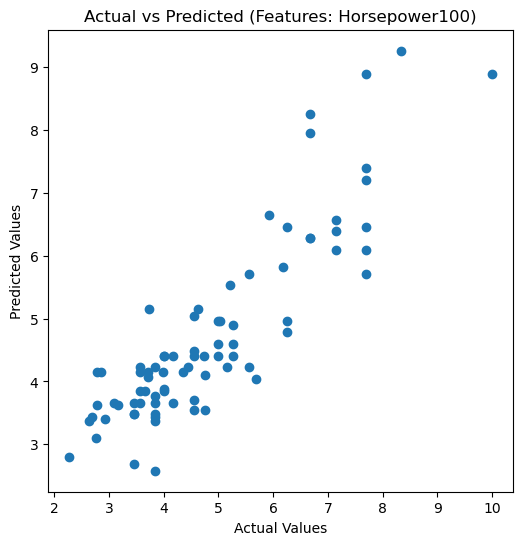

Features: ['Displacement100ci'] | Mean Squared Error: 0.621724699629383
Model trained with features: ['Displacement100ci']
R² Score on entire dataset: 0.7495


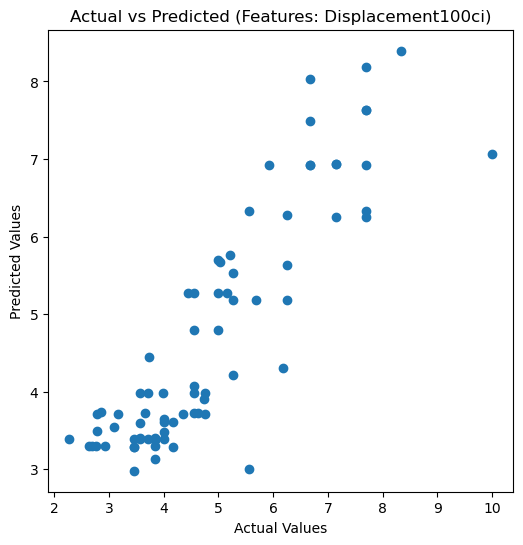

Features: ['Weight1000lb'] | Mean Squared Error: 0.44037948850371894
Model trained with features: ['Weight1000lb']
R² Score on entire dataset: 0.7829


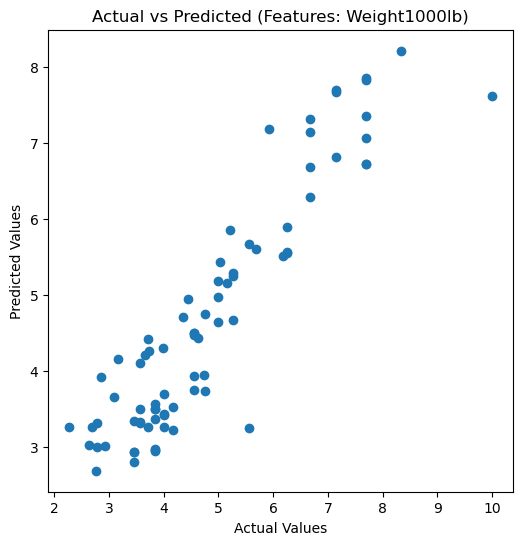

In [153]:
features_list = [
    ['Horsepower100'],
    ['Displacement100ci'],
    ['Weight1000lb'],
]

for features in features_list:
    linear_regression_model(features, 'GallonsPer100Miles', df)

- The plot shows that `Weight1000lb` makes more sense because the MSE is 0.44 which is the least one, and the highest `r2` score.
- So In the end we train the model by `Weight1000lb`.

In [154]:
    X = df[['Weight1000lb']]
    y = df['GallonsPer100Miles']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

## 3 Model Evaluation

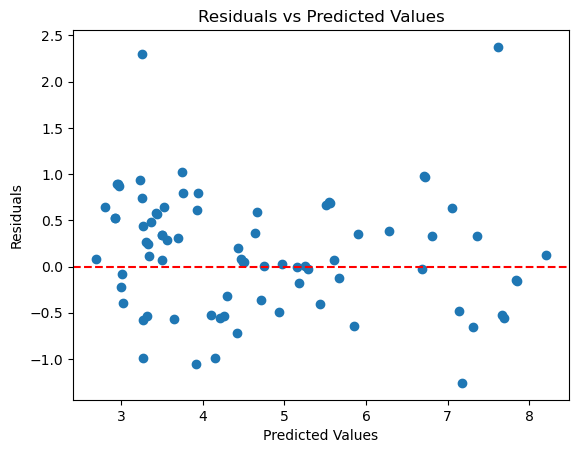

In [155]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

- The residuals are randomly allocated around zero, indicating the model's assumptions are valid. However, there are still a some outliers.

## 4 Testing with New Values

- We applied the median value for our Interpolatiion test.
- And the max value plus 1 for our Extrapolation test.

Interpolation value: 2.8034999999999997, Extrapolation value: 6.14
Predicted Fuel Consumption (Interpolation, 2.8034999999999997): 4.445660626360378
Predicted Fuel Consumption (Extrapolation, 6.14): 10.299144234458499


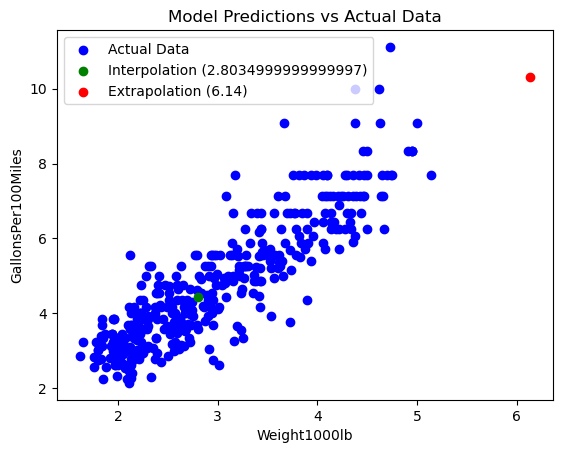

In [156]:
middle_value = df['Weight1000lb'].median()
extrapolated_value = df['Weight1000lb'].max() + 1

print(f"Interpolation value: {middle_value}, Extrapolation value: {extrapolated_value}")

new_data = pd.DataFrame({'Weight1000lb': [middle_value, extrapolated_value]})
predicted = model.predict(new_data)

print(f"Predicted Fuel Consumption (Interpolation, {middle_value}): {predicted[0]}")
print(f"Predicted Fuel Consumption (Extrapolation, {extrapolated_value}): {predicted[1]}")

plt.scatter(df['Weight1000lb'], df['GallonsPer100Miles'], color='blue', label='Actual Data')  # 实际数据
plt.scatter([middle_value], [predicted[0]], color='green', label=f'Interpolation ({middle_value})')  # 内插点
plt.scatter([extrapolated_value], [predicted[1]], color='red', label=f'Extrapolation ({extrapolated_value})')  # 外推点

plt.xlabel('Weight1000lb')
plt.ylabel('GallonsPer100Miles')
plt.title('Model Predictions vs Actual Data')
plt.legend()
plt.show()


- The interpolation point falls within the data range and aligns well with the observed trend, which is a reliable prediction.
- The extrapolation point follows the model's linear trend. But without real data beyond the range, we cannot 100% trust this result.